In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import random
import time
import csv

In [2]:
# --- Helper: Check if a subset is a vertex cover ---
def is_vertex_cover(sample_nodes, edges):
    for u, v in edges:
        if u not in sample_nodes and v not in sample_nodes:
            return False
    return True

# --- Brute Force Minimum Vertex Cover ---
def minimum_vertex_cover(nodes, edges):
    for r in range(1, len(nodes) + 1):
        for subset in itertools.combinations(nodes, r):
            if is_vertex_cover(subset, edges):
                return set(subset)
    return set(nodes)  # fallback (shouldn't happen normally)

In [3]:
# --- Graph Drawing with Colored Cover ---
def draw_graph(G, cover, title):
    node_colors = ["orange" if node in cover else "lightblue" for node in G.nodes()]

    nx.draw(
        G,
        pos=nx.spring_layout(G, seed=42),
        with_labels=True,
        node_color=node_colors,
        node_size=800,
        font_color="black",
        font_size=12,
        edge_color="grey",
        width=2
    )
    plt.title(title)
    plt.show()

### Graph with 10 nodes and [10, 20, 30, 40, 50, 60, 70, 80, 90, 100] edges


Running experiment for n=10, m=10
Brute Force Vertex Cover: {9, 2, 3, 6}
Size: 4, Time: 0.000180 sec


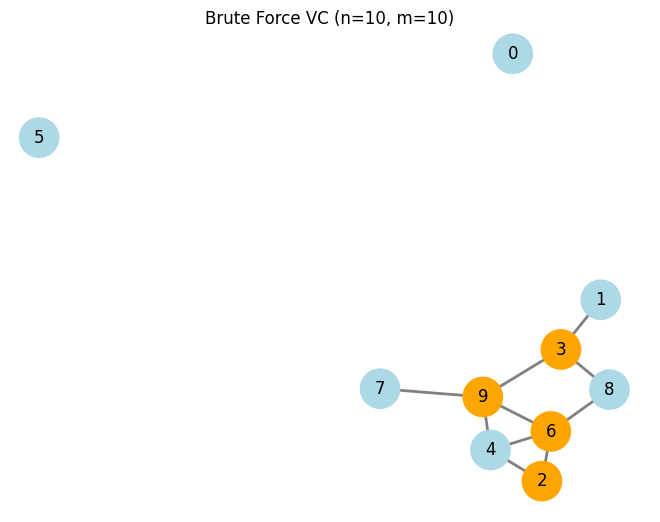


Running experiment for n=10, m=20
Brute Force Vertex Cover: {0, 1, 3, 4, 7}
Size: 5, Time: 0.000241 sec


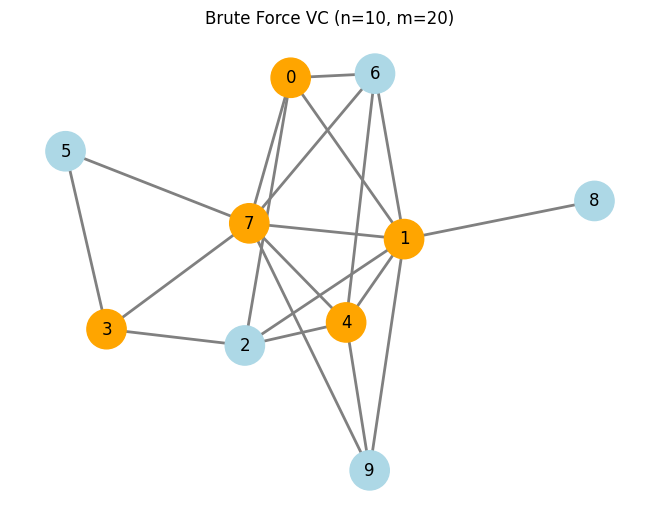


Running experiment for n=10, m=30
Brute Force Vertex Cover: {1, 2, 3, 6, 7, 8, 9}
Size: 7, Time: 0.000535 sec


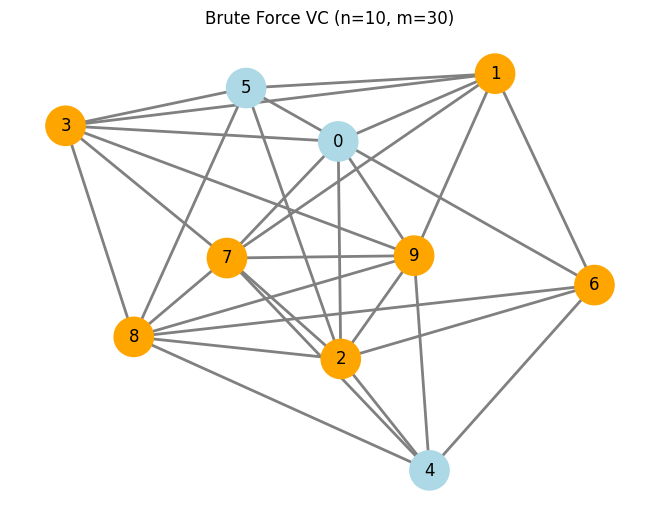


Running experiment for n=10, m=40
Brute Force Vertex Cover: {0, 1, 2, 3, 4, 5, 8, 9}
Size: 8, Time: 0.001158 sec


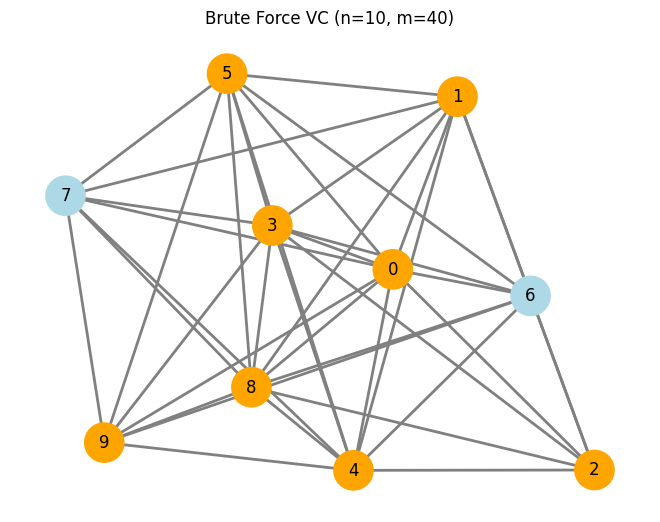


Running experiment for n=10, m=50
Brute Force Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8}
Size: 9, Time: 0.001367 sec


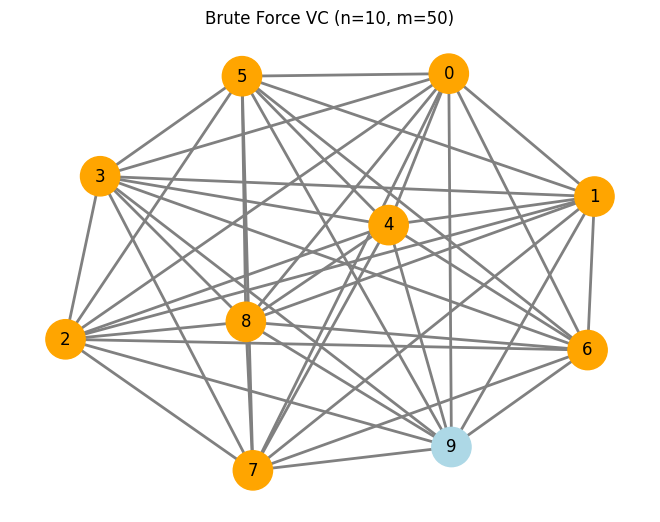


Running experiment for n=10, m=60
Brute Force Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8}
Size: 9, Time: 0.001285 sec


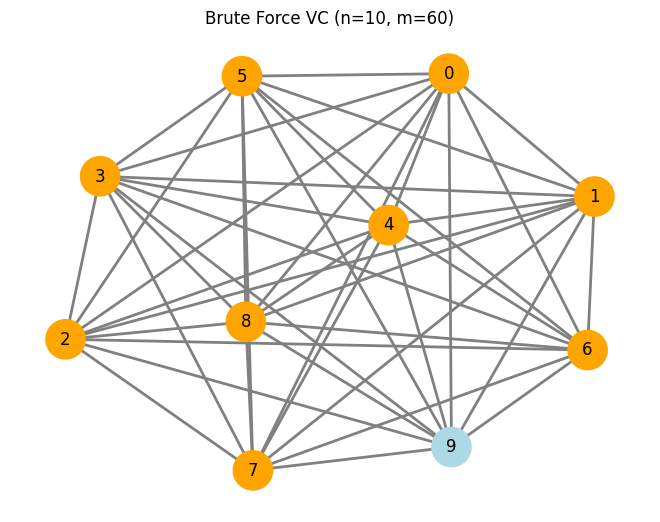


Running experiment for n=10, m=70
Brute Force Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8}
Size: 9, Time: 0.000705 sec


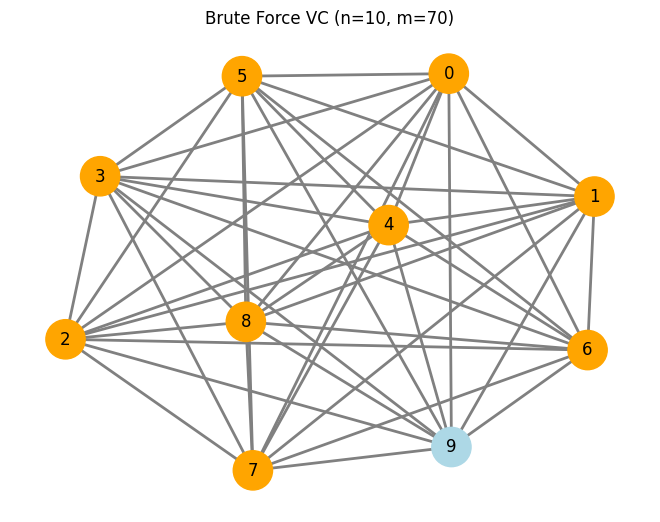


Running experiment for n=10, m=80
Brute Force Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8}
Size: 9, Time: 0.000712 sec


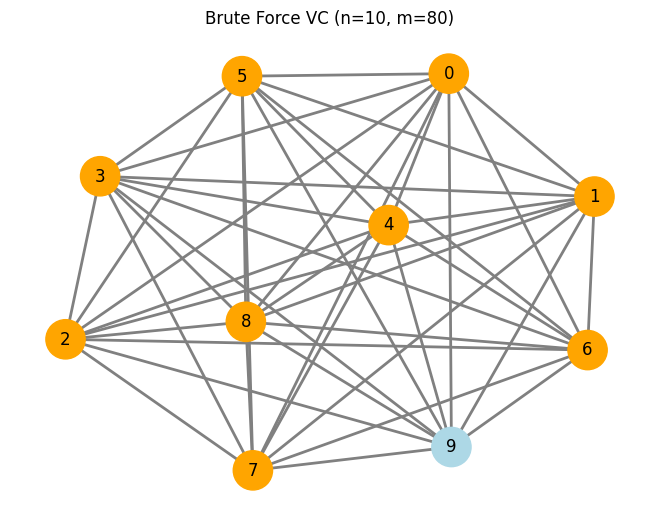


Running experiment for n=10, m=90
Brute Force Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8}
Size: 9, Time: 0.001280 sec


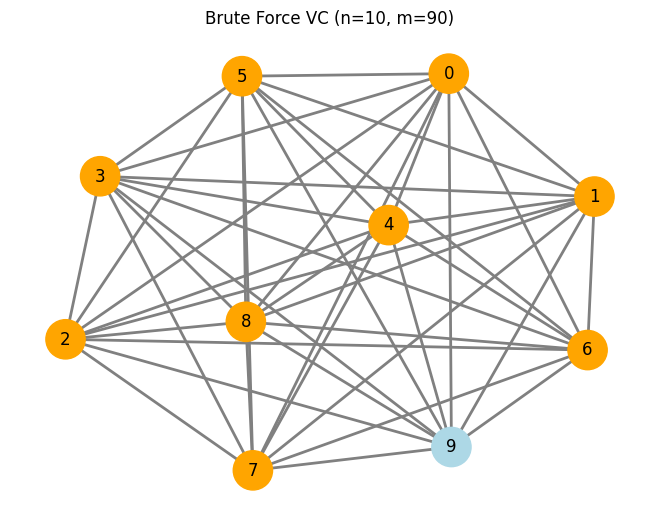


Running experiment for n=10, m=100
Brute Force Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8}
Size: 9, Time: 0.000685 sec


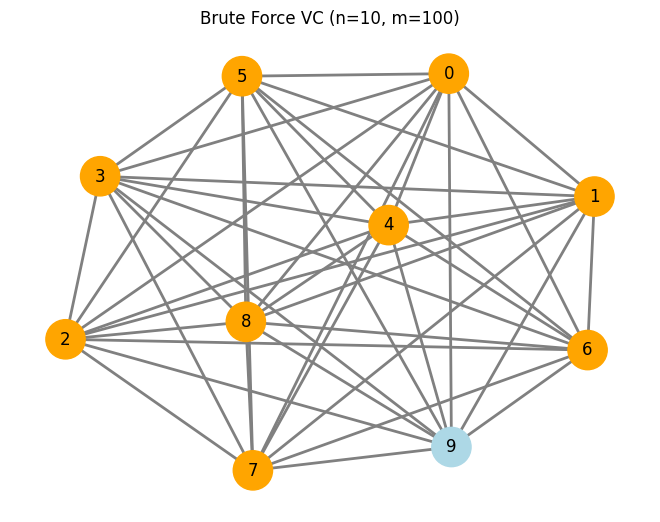

In [4]:
# --- Read from file ---
with open("input.txt", "r") as f:
    lines = f.readlines()
    n = int(lines[0].strip())  # first line = number of nodes
    m_values = list(map(int, lines[1].strip().split(",")))  # second line = edge counts
results = []

for m in m_values:
    print("\n==============================")
    print(f"Running experiment for n={n}, m={m}")
    print("==============================")

    # Generate random graph
    graph = nx.gnm_random_graph(n, m, seed=None)
    nodes = list(graph.nodes())
    edges = list(graph.edges())

    # Brute Force
    start = time.time()
    cover_bf = minimum_vertex_cover(nodes, edges)
    time_bf = time.time() - start
    print(f"Brute Force Vertex Cover: {cover_bf}")
    print(f"Size: {len(cover_bf)}, Time: {time_bf:.6f} sec")

    # Record results
    results.append([n, m, len(cover_bf), time_bf])

    # Draw graph with cover
    draw_graph(graph, cover_bf, f"Brute Force VC (n={n}, m={m})")

In [5]:
# --- Save results to CSV ---
with open("bruteforce_vertex_cover_results.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["n", "m", "BruteForce_Size", "BruteForce_Time(s)"])
    writer.writerows(results)
print("\nAll results saved to bruteforce_vertex_cover_results.csv ✅")


All results saved to bruteforce_vertex_cover_results.csv ✅
